# <font color= #FF1493 size= 6 ><center><u>NLP Challenge</u></center></font>

# Problem 1:

IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis

### Data Dictionary:

<b>Variable Name</b><br>
review<br>
sentiment<br>

## Read the dataset. Do the descriptive statistics. Write an inference on it.

#### Upload Required Libraries

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To calculate the metrics of the model
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
import nltk
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.tokenize import word_tokenize, sent_tokenize
# To model the classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#### Importing data

In [2]:
df=pd.read_csv('IMDBDataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### As per the head of data, we can state that all are text and sentiment is the categorical data.

In [4]:
df.shape

(50000, 2)

#### We have 50000 records with 2 variables in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe(include = 'all').T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,negative,25000


In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 418


,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
df.shape

(49582, 2)

#### Inference:
• There are 49582 rows without duplicate and 2 features, no null values present in the dataset <br>
• In dataset 2 are object variables <br>
• 418 duplicate rows are present in the dataset. I have removed the duplicates.

### Exploratory data analysis

In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


### There is no null values in the data set. No need to do missing value imputation.

In [13]:
print(df.shape)

(49582, 2)


#### We have 49582 unique records with 2 variables in the dataset after delete the duplicate records.

### Data Visualization
### Univariate Analysis

In [14]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,The chemistry between Sally Hawkins and Elaine...,positive
freq,1,24884


#### Insights:
• We have 49582 unique reviews<br>
• Based on the review content it splited into 2 sentiment as positive or negative<br>

### Categorical Variable

<AxesSubplot:xlabel='sentiment', ylabel='count'>

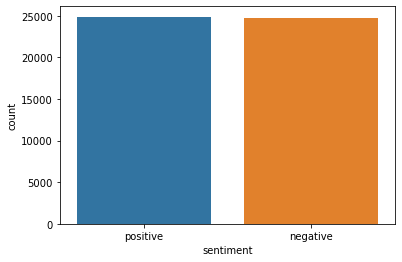

In [15]:
sns.countplot(x='sentiment', data=df)

In [16]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

#### Insights:
Positive sentiments are maximum in dataset.

<b>Inference:</b><br>
As per univariate analysis, positive sentiment with movie review is slightly higher than the negative moview review.

As per the original dataset we have categorical data. So, no need to scale the data for modelling 

### Data encoding

In [17]:
cat = ['sentiment']
df =pd.get_dummies(df, columns=cat, drop_first=True)

In [18]:
df.head()

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [19]:
df['sentiment_positive'] = df['sentiment_positive'].replace([1, 0], ["1","0"])


In [20]:
df.head()

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Remove all special characters and html tags

In [21]:
#removing html tags
df.review=df.review.str.replace('<[^<]+?>','')
df.head()

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [22]:
#removing punctuations and special characters 
df["review"] = df['review'].str.replace('[^\w\s]','')
df.head()

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tech...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1


In [23]:
#removing url
def remove_url(text):
    pattern=re.compile(r'https ? ://\s+|www\.\s+')
    return pattern.sub(r'',text)

In [24]:
df['review']=df['review'].apply(remove_url)

### Tokenization

In [25]:
nltk.word_tokenize(df["review"][0])

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'youll',
 'be',
 'hooked',
 'They',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'meThe',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 'Trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'Its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'wordIt',
 'is',
 'called',
 'OZ',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'It',
 'focuses',
 'mainly',
 'on',
 'Emerald',

In [26]:
df['words'] = df.apply(lambda x : nltk.word_tokenize(x['review']), axis=1)
df

,review,sentiment_positive,words
0,One of the other reviewers has mentioned that ...,1,"[One, of, the, other, reviewers, has, mentione..."
1,A wonderful little production The filming tech...,1,"[A, wonderful, little, production, The, filmin..."
2,I thought this was a wonderful way to spend ti...,1,"[I, thought, this, was, a, wonderful, way, to,..."
3,Basically theres a family where a little boy J...,0,"[Basically, theres, a, family, where, a, littl..."
4,Petter Matteis Love in the Time of Money is a ...,1,"[Petter, Matteis, Love, in, the, Time, of, Mon..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,"[I, thought, this, movie, did, a, down, right,..."
49996,Bad plot bad dialogue bad acting idiotic direc...,0,"[Bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,0,"[I, am, a, Catholic, taught, in, parochial, el..."
49998,Im going to have to disagree with the previous...,0,"[Im, going, to, have, to, disagree, with, the,..."


#### To display top 20 frequently used words in the review.

In [27]:
pd.Series(' '.join(df.review).split()).value_counts()[:20]

the      567751
a        306278
and      304440
of       282893
to       261439
is       206677
in       171519
I        135063
that     131266
it       127866
this     118741
was       93765
as        84053
with      83828
for       81780
movie     81669
The       75023
film      72996
but       66989
on        63919
dtype: int64

### Remove all the stopwords from all reviews

#### Import libraries

In [28]:
conda install -c r r-wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [29]:
chatword={'AFAIK':'As Far As I Know',
'AFK':'Away From Keyboard',
'ASAP':'As Soon As Possible',
'ATK':'At The Keyboard',
'ATM':'At The Moment',
'A3':'Anytime, Anywhere, Anyplace',
'BAK':'Back At Keyboard',
'BBL':'Be Back Later',
'BBS':'Be Back Soon',
'BFN':'Bye For Now',
'B4N':'Bye For Now',
'BRB':'Be Right Back',
'BRT':'Be Right There',
'BTW':'By The Way',
'B4':'Before',
'B4N':'Bye For Now',
'CU':'See You',
'CUL8R':'See You Later',
'CYA':'See You',
'FAQ':'Frequently Asked Questions',
'FC':'Fingers Crossed',
'FWIW':'For What Its Worth',
'FYI':'For Your Information',
'GAL':'Get A Life',
'GG':'Good Game',
'GN':'Good Night',
'GMTA':'Great Minds Think Alike',
'GR8':'Great!',
'G9':'Genius',
'IC':'I See',
'ICQ':'I Seek you (also a chat program)',
'ILU':'ILU: I Love You',
'IMHO':'In My Honest/Humble Opinion',
'IMO':'In My Opinion',
'IOW':'In Other Words',
'IRL':'In Real Life',
'KISS':'Keep It Simple, Stupid',
'LDR':'Long Distance Relationship',
'LMAO':'Laugh My A.. Off',
'LOL':'Laughing Out Loud',
'LTNS':'Long Time No See',
'L8R':'Later',
'MTE':'My Thoughts Exactly',
'M8':'Mate',
'NRN':'No Reply Necessary',
'OIC':'Oh I See',
'PITA':'Pain In The A..',
'PRT':'Party',
'PRW':'Parents Are Watching',
'QPSA':'Que Pasa?',
'ROFL':'Rolling On The Floor Laughing',
'ROFLOL':'Rolling On The Floor Laughing Out Loud',
'ROTFLMAO':'Rolling On The Floor Laughing My A.. Off',
'SK8':'Skate',
'STATS':'Your sex and age',
'ASL':'Age, Sex, Location',
'THX':'Thank You',
'TTFN':'Ta-Ta For Now!',
'TTYL':'Talk To You Later',
'U':'You',
'U2':'You Too',
'U4E':'Yours For Ever',
'WB':'Welcome Back',
'WTF':'What The F...',
'WTG':'Way To Go!',
'WUF':'Where Are You From?',
'W8':'Wait...'
}

### Basic Pre-Processing
Lower Case conversion:

In [30]:
df['review'] = df['review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [31]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

#### Removal of Punctuation:

In [32]:
df['review']=df['review'].str.replace('[^a-zA\s]', '')
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

### Removal of StopWords

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')
stopwordlist.extend(["u", "let","know","america","wa", "ha", "still", "from","subject", "re", "edu", "use", "of", "the", "that", "after", "on"])

In [35]:
df['review'] = df['review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stopwordlist))

### Use Lemmatizer to change the words to root form

In [36]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
lemma = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: ' '.join([lemma.lemmatize(x) for x in x.split()]))

In [38]:
df['review']

0        one reviewer mentioned watching oz episode you...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically there family little boy jake think t...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movie high art fan expec...
Name: review, Length: 49582, dtype: object

In [39]:
def chat_words(text):
    new_text=[]
    for w in text.split():
        if w.upper()in chatword:
            new_text.append(chatword[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [40]:
#removing chat words
df['review']=df['review'].apply(chat_words)

In [41]:
df.review=df.review.str.lower()
df.review=df.review.str.replace('<[^<]+?>','')
df["review"] = df['review'].str.replace('[^\w\s]','')

In [42]:
df.head()

,review,sentiment_positive,words
0,one reviewer mentioned watching oz episode you...,1,"[One, of, the, other, reviewers, has, mentione..."
1,wonderful little production filming technique ...,1,"[A, wonderful, little, production, The, filmin..."
2,thought wonderful way spend time hot summer we...,1,"[I, thought, this, was, a, wonderful, way, to,..."
3,basically there family little boy jake think t...,0,"[Basically, theres, a, family, where, a, littl..."
4,petter matteis love time money visually stunni...,1,"[Petter, Matteis, Love, in, the, Time, of, Mon..."


In [43]:
df.review[0]

'one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bitch d

<AxesSubplot:>

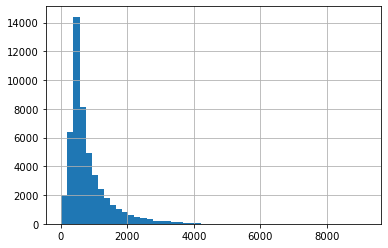

In [44]:
#analysis of number of characters in a review
df['review'].str.len().hist(bins=50)

In [45]:
df1=df['review'].str.split()

<AxesSubplot:>

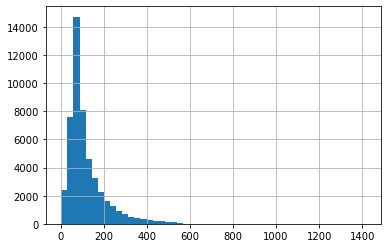

In [46]:
#analysis of number of words in a review
df1.str.len().hist(bins=50)

In [47]:
df_negative=df[df.sentiment_positive=="0"]
df_negative.head()

,review,sentiment_positive,words
3,basically there family little boy jake think t...,0,"[Basically, theres, a, family, where, a, littl..."
7,show amazing fresh innovative idea first aired...,0,"[This, show, was, an, amazing, fresh, innovati..."
8,encouraged positive comment film looking forwa...,0,"[Encouraged, by, the, positive, comments, abou..."
10,phil alien one quirky film humour based around...,0,"[Phil, the, Alien, is, one, of, those, quirky,..."
11,saw movie came recall scariest scene big bird ...,0,"[I, saw, this, movie, when, I, was, about, 12,..."


In [48]:
df_positive=df[df.sentiment_positive=="1"]
df_positive.head()

,review,sentiment_positive,words
0,one reviewer mentioned watching oz episode you...,1,"[One, of, the, other, reviewers, has, mentione..."
1,wonderful little production filming technique ...,1,"[A, wonderful, little, production, The, filmin..."
2,thought wonderful way spend time hot summer we...,1,"[I, thought, this, was, a, wonderful, way, to,..."
4,petter matteis love time money visually stunni...,1,"[Petter, Matteis, Love, in, the, Time, of, Mon..."
5,probably alltime favorite movie story selfless...,1,"[Probably, my, alltime, favorite, movie, a, st..."


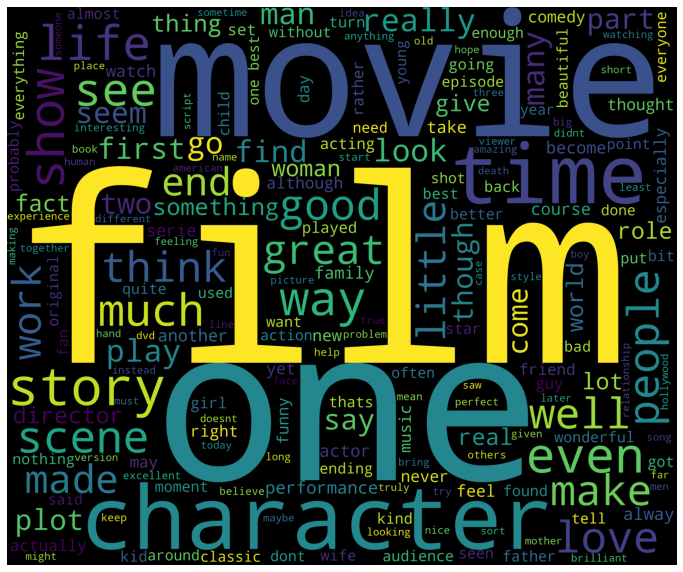

In [49]:
#visualisation of positive sentiments
text_positive= " ".join(i for i in df_positive.review)
text_positivecleanwords = " ".join([word for word in text_positive.split()])
wordcloud_text_positive = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(text_positivecleanwords)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_text_positive)
plt.axis('off')
plt.show()

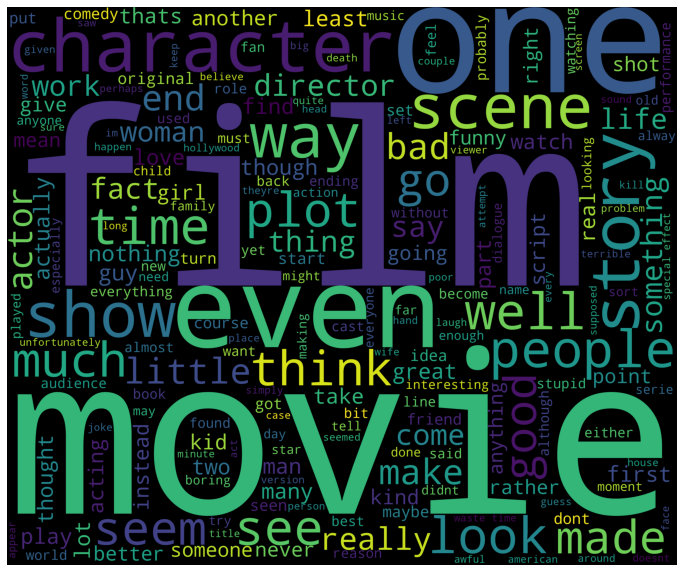

In [50]:
#visualisation of negative sentiments
text_negative= " ".join(i for i in df_negative.review)
text_negativecleanwords = " ".join([word for word in text_negative.split()])
wordcloud_text_negative = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(text_negativecleanwords)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_text_negative)
plt.axis('off')
plt.show()

## Train/ Test split for the data
#### Extracting the target column into separate vectors for training set and test set

In [51]:
x = df[['review']]
y = df[['sentiment_positive']]

#### Splitting data into training and test set

In [52]:
x_train=df.review[:40000]
y_train=df.sentiment_positive[:40000]
x_test=df.review[40000:]
y_test=df.sentiment_positive[40000:]

There is a specific to choose partion till 40k records and remaining as test records. Total observation in our dataset is 49582.

Train and Test dataset for both Independant and Dependant variable are given below.

In [53]:
pd.DataFrame(x_train)

,review
0,one reviewer mentioned watching oz episode you...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically there family little boy jake think t...
4,petter matteis love time money visually stunni...
...,...
40265,movie bad tjough one cannot find anything new ...
40266,hell pay disappointment anywhere near substanc...
40267,elementary sort traditional ghost story even e...
40268,love science fiction fascinated egyptian mytho...


In [54]:
pd.DataFrame(x_test)

,review
40270,parsifal starring michael kutter armin jordan ...
40271,movie good start portraying interesting strong...
40272,first saw film th grade remember profound affe...
40273,movie described oh yeah ive got wretchedim big...
40274,worse film every seen like honest reviewer exc...
...,...
49995,thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary school nu...
49998,im going disagree previous comment side maltin...


In [55]:
pd.DataFrame(y_train)

,sentiment_positive
0,1
1,1
2,1
3,0
4,1
...,...
40265,0
40266,0
40267,0
40268,0


In [56]:
pd.DataFrame(y_test)

,sentiment_positive
40270,1
40271,0
40272,1
40273,0
40274,0
...,...
49995,1
49996,0
49997,0
49998,0


#### Checking the dimensions of the training and test data

In [57]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (40000,)
x_test (9582,)
y_train (40000,)
y_test (9582,)


### Term Frequency-Inverse Document Frequency model (TFIDF)

It is used to convert text documents to matrix of tfidf features.

In [58]:
#Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tf_train_reviews=tf.fit_transform(x_train)
#transformed test reviews
tf_test_reviews=tf.transform(x_test)
print('Tfidf_train:',tf_train_reviews.shape)
print('Tfidf_test:',tf_test_reviews.shape)

Tfidf_train: (40000, 6440872)
Tfidf_test: (9582, 6440872)


## Models

I have choose the classification models since the target variable is caregorical variable and we need to predict the variable.

Here is the list of models I have used for this problem. Also, I have used model tunning to get better results.

1. Logistic Regression 
2. GaussianNB
3. Support Vector Machines
4. KNN

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [60]:
nb = MultinomialNB()
lgr1 = LogisticRegression(max_iter=10000, penalty='l2', solver='sag', tol=0.00001, verbose=True,n_jobs=-1)
lgr2 = LogisticRegression(max_iter=10000, penalty='l2', solver='lbfgs', tol=0.0001, verbose=True,n_jobs=-1)
lgr3 = LogisticRegression(max_iter=10000, penalty='l2', solver='newton-cg', tol=0.001, verbose=True,n_jobs=-1)
knn= KNeighborsClassifier()

In [61]:
model = [nb, lgr1, lgr2, lgr3, knn]

for i in model: #accuracy on train set from training data
    i.fit(tf_train_reviews, y_train)
    y_predict = i.predict(tf_train_reviews)
    display(accuracy_score(y_train, y_predict))

0.999925

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 28 epochs took 13 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.2s finished


0.999925

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.0s finished


0.999925

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.4s finished


0.999925

0.63525

In [62]:
for i in model:  #accuracy on test set from training data
    i.fit(tf_train_reviews , y_train)
    y_predict_test = i.predict(tf_test_reviews)
    display(accuracy_score(y_test, y_predict_test))

0.7434773533709038

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 31 epochs took 14 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.4s finished


0.7397203089125444

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.6s finished


0.7397203089125444

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.0s finished


0.7397203089125444

0.4996869129618034

Interpretation:

Based on the accuracy of each model, we can see that Naive Bayes give us the best accuracy on the train and test data. For sentiment analysis on the movie review we can use Multinomial Naive Bayes to predict the sentiment on the review.

END